$$
P_{i}^{(local)}={\dfrac{1}{M}\sum_{j \in G_{i} \cup {i}}(\dfrac{r_{1}\sum_{k \in G_{j}}c_{1,k}}{M} + \dfrac{r_{2}\sum_{k \in G_{j}}c_{2,k}}{M})}-(c_{1,i}+c_{2,i})
$$


$$
P_{i}^{(global)}=(\dfrac{r_{1}\sum_{k=1}^{N}g_{1,k}}{N})+(\dfrac{r_{2}\sum_{k=1}^{N}g_{2,k}}{N})-(g_{1,i}+g_{2,i})

$$

$$
P_{i}^{(hybrid)}=\dfrac{1}{M}\sum_{j \in G_{i} \cup {i}}(\dfrac{r_{1}\sum_{k \in G_{j}}g_{1,k}}{M}) + (\dfrac{r_{2}\sum_{k=1}^{N}g_{2,k}}{N})-(g_{1,i}+g_{2,i})
$$

$$
P(i)
$$

In [68]:
import sPGG
from sPGG import run_simulation_homo, run_simulation_hybrid, run_simulation_localized
import numpy as np
import matplotlib.pyplot as plt
import importlib
importlib.reload(sPGG)

<module 'sPGG' from '/Users/govindrnair/SGN_2025/sPGG.py'>

In [153]:
init_matrix = np.zeros((100,100))
init_matrix[:20,:20] = 1
init_matrix[30:46,30:46] = 2

checkerboard=np.zeros((100,100))
checkerboard[:33,:33]=1
checkerboard[:33,66:]=2
checkerboard[33:66,:33]=0
checkerboard[33:66,33:66]=2
checkerboard[33:66,66:]=1
checkerboard[66:,:33]=2
checkerboard[66:,33:66]=1



Initializing Population...
Building Neighbour Cache...
Running simulations...
------------------------------
DIAGNOSTIC CHECK (Before Animation):
Lattice Color Counts (Should see 0.0 for Coops): {np.float64(0.0): np.int64(9344), np.float64(1.0): np.int64(400), np.float64(2.0): np.int64(256)}
Strategy Frequencies (Coop, Ch1, Ch2): [0.9344, 0.04, 0.0256]
CONFIRMED: There are 9344 Blue pixels ready to plot.
------------------------------
Animating...


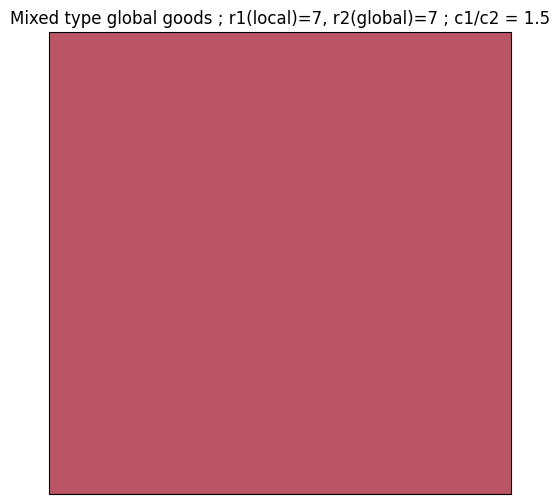

In [155]:

sim_params_0 = {'N':100,'synergy_factor_1':1,'synergy_factor_2':1,'noise':10,'composition':None}
sim_params_1 = {'N':100,'synergy_factor_1':7,'synergy_factor_2':7 ,'noise':0.1,'composition':[1/3,1/3,1/3],
                'cost_good_1':1.5,'cost_good_2':1,'init_arrangement':init_matrix,'sim_type':'frequecy',
                'num_frames':500,'time_series':False,'show_anim':True,'save_movie':True}
test = run_simulation_hybrid(sim_params=sim_params_1,file_name="seed_0")

In [146]:
time_arr = np.linspace(0,len(test),len(test))
test = test.T
np.save('homo_random_pos.npy',test)



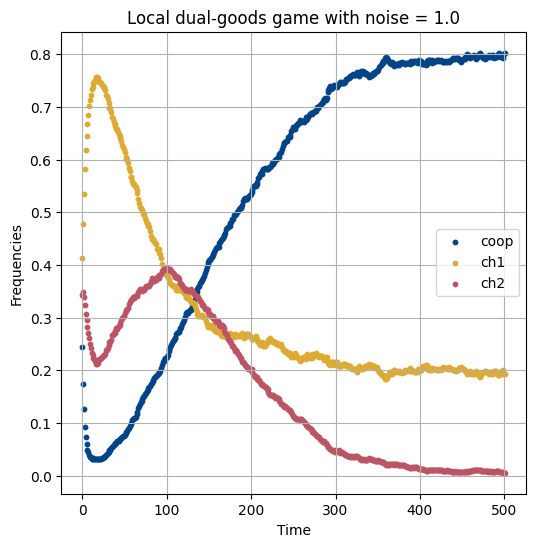

In [148]:
plt.figure(figsize=(6,6))
plt.title("Local dual-goods game with noise = 1.0")
plt.scatter(time_arr,test[0],label='coop',color="#004488",s=10)
plt.scatter(time_arr,test[1],label='ch1',color="#DDAA33",s=10)
plt.scatter(time_arr,test[2],label='ch2',color="#BB5566",s=10)
plt.ylabel("Frequencies")
plt.xlabel('Time')
plt.grid(True)
plt.legend()
plt.show()